# Objective:-

## The end goal of this task would be to identify opportunities to increase the occupancy rate on low-performing flights, which can ultimately lead to increased profitability for the airline.


# Importing Libraries


In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Database Connection

In [17]:
connection = sqlite3.connect('travel.sqlite')
cursor=connection.cursor()

In [18]:
cursor.execute(""" select name from sqlite_master where type='table';""")
print('List of tables present in the database')
table_list=[table[0] for table in cursor.fetchall()]
table_list

List of tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Data Exploration

In [21]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", connection)
#aircrafts_data.columns
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [22]:
airports_data = pd.read_sql_query("select * from airports_data", connection)
#airports_data.columns
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [23]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", connection)
#boarding_passes.columns
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [24]:
bookings = pd.read_sql_query("select * from bookings", connection)
#bookings.columns
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [25]:
flights = pd.read_sql_query("select * from flights", connection)
#flights.columns
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [26]:
seats = pd.read_sql_query("select * from seats", connection)
#seats.columns
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [27]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", connection)
#ticket_flights.columns
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


# checking the Null values

In [31]:
for table in table_list:
    print("\n table: ",table)
    df_table = pd.read_sql_query(f"select * from {table}", connection)
    print(df_table.isnull().sum())


 table:  aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

 table:  airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

 table:  boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

 table:  bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

 table:  flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

 table:  seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

 table:  ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

 table:  tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# Basic Analysis

## How many planes have more than 100 seats?

In [36]:
seat_count = pd.read_sql_query("select aircraft_code, count(*) as Total_Seats from seats group by aircraft_code having Total_Seats > 100 order by Total_Seats desc", connection)
seat_count

,aircraft_code,Total_Seats
0,773,402
1,763,222
2,321,170
3,320,140
4,733,130
5,319,116


## How the number of tickets booked and total amount earned change with the time

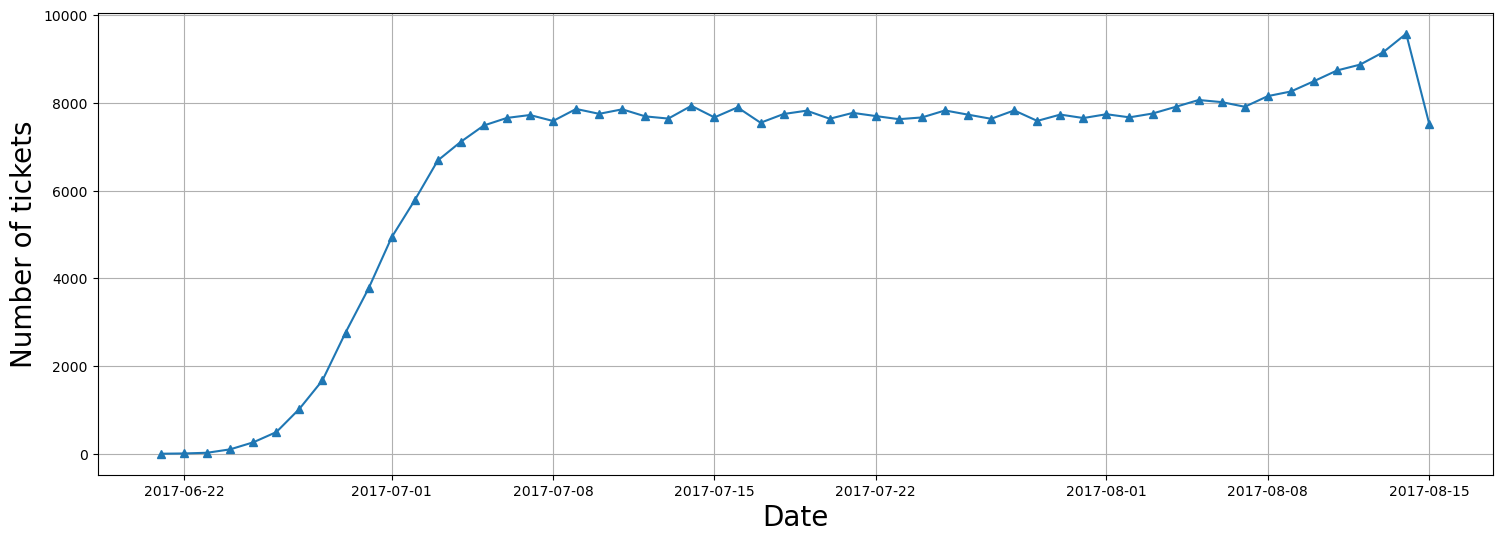

In [40]:
tickets=pd.read_sql_query("""select * from tickets inner join bookings  on tickets.book_ref=bookings.book_ref""",connection)
tickets['book_date']=pd.to_datetime(tickets['book_date'])
tickets['date']=tickets['book_date'].dt.date
x=tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,6))
plt.plot(x.index,x['date'],marker='^')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of tickets',fontsize=20)
plt.grid('b')
plt.show()

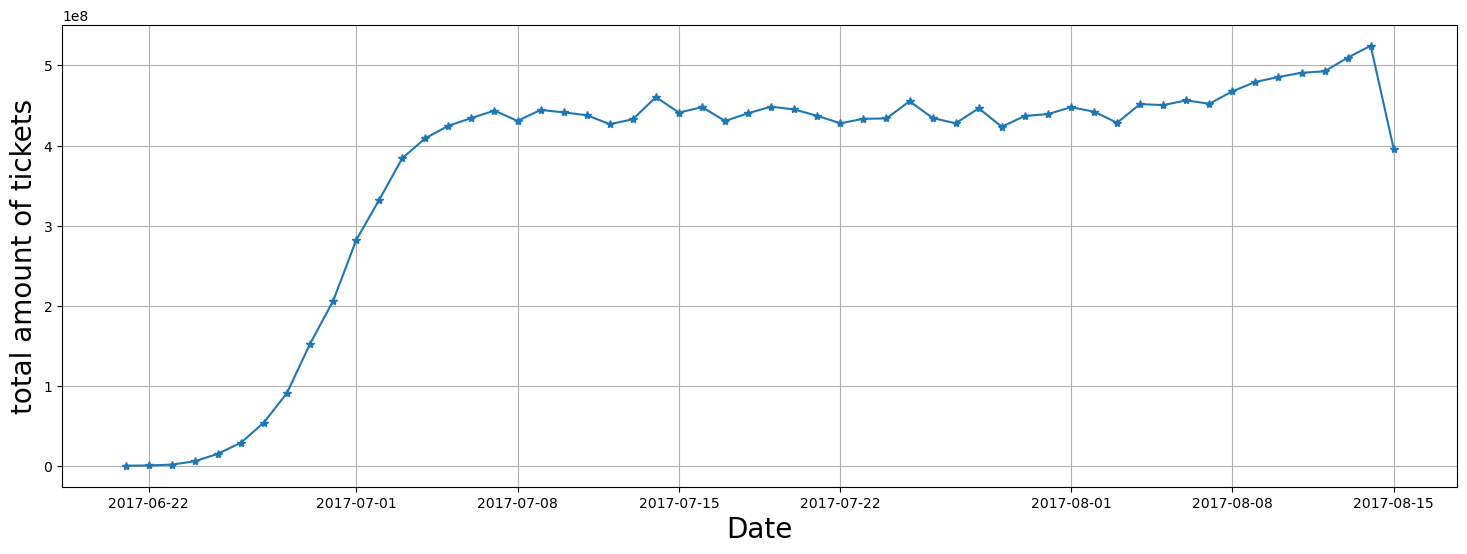

In [43]:
bookings=pd.read_sql_query("select * from bookings",connection)
bookings['book_date']=pd.to_datetime(bookings['book_date'])
bookings['date']=bookings['book_date'].dt.date
x=bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(18,6))
plt.plot(x.index,x['total_amount'],marker='*')
plt.xlabel('Date',fontsize=20)
plt.ylabel('total amount of tickets',fontsize=20)
plt.grid('b')
plt.show()

## Maximum Bookings with respect to Month

In [44]:
booking = pd.read_sql_query("select * from bookings",connection)
booking

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [45]:
booking['book_date'] = pd.to_datetime(booking['book_date'])
booking['month'] = booking['book_date'].dt.month_name()
month_count = booking['month'].value_counts()
month_count

month
July      167062
August     88423
June        7303
Name: count, dtype: int64

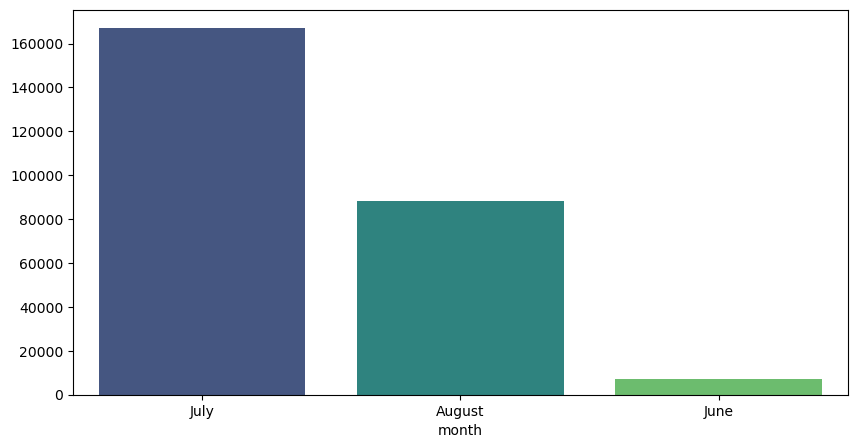

In [47]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x=month_count.index , y=month_count.values, palette='viridis')
plt.show()

## Count the fare conditions on which passengers use most

In [49]:
fare_count = pd.read_sql_query("select fare_conditions from ticket_flights", connection)
print(fare_count.value_counts())

df = pd.read_sql_query("SELECT fare_conditions, aircraft_code, avg(amount) as Average_Amount from ticket_flights "
                       "join flights on ticket_flights.flight_id = flights.flight_id "
                       "group by aircraft_code, fare_conditions",connection)
df

fare_conditions
Economy            920793
Business           107642
Comfort             17291
Name: count, dtype: int64


,fare_conditions,aircraft_code,Average_Amount
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


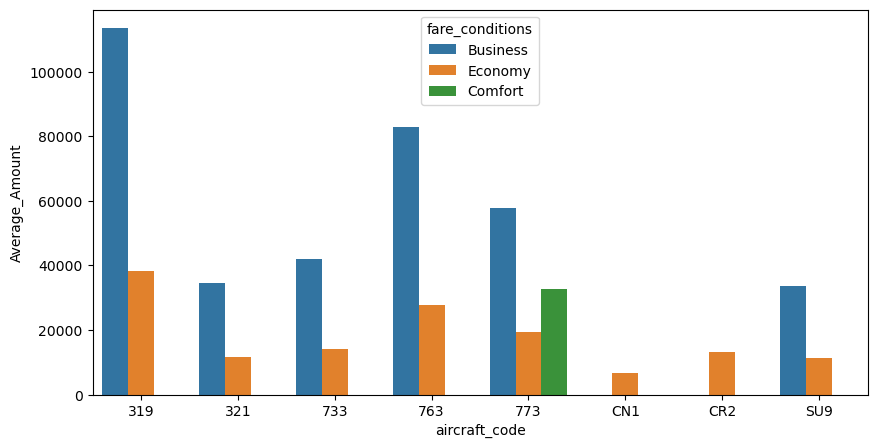

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(data= df, x="aircraft_code", y="Average_Amount", hue="fare_conditions")
plt.show()

## For each aircraft, calculate the total revenue and average revenue per ticket

In [51]:
average_revenue_per_ticket = pd.read_sql_query("select aircraft_code,Ticket_Count, Total_Revenue, Total_Revenue/Ticket_Count as Average_Revenue from (select aircraft_code, count(*) as Ticket_Count, sum(amount) as Total_Revenue from ticket_flights join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code) "
,connection)
average_revenue_per_ticket

,aircraft_code,Ticket_Count,Total_Revenue,Average_Revenue
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


## Calculate the average charges for each aircraft with different fare conditions

In [58]:
df=pd.read_sql_query(""" select fare_conditions,aircraft_code,avg(amount) from ticket_flights join flights on ticket_flights.flight_id=flights.flight_id group by aircraft_code,fare_conditions""",connection)
df

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


<Axes: xlabel='aircraft_code', ylabel='avg(amount)'>

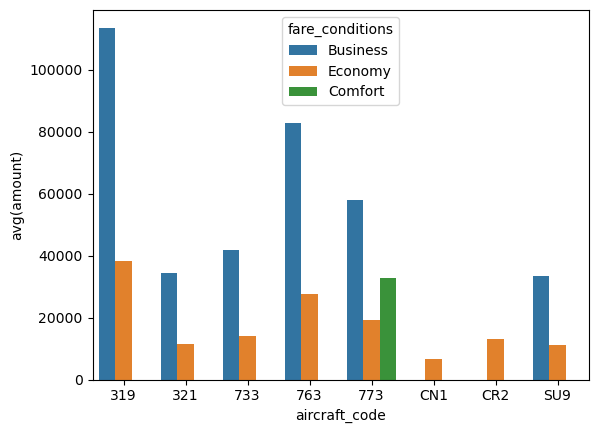

In [59]:
sns.barplot(data=df,x='aircraft_code',y='avg(amount)',hue='fare_conditions')
